In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv('../data/train_enc.csv')

In [ ]:
# Split the data into training and validation sets
train, validation = train_test_split(df, test_size=0.2, random_state=200, shuffle=True)

print(train.shape)
print(validation.shape)

In [ ]:
# split the columns into features and target; ie x y split
target = 'SalePrice'
X_train = train.drop(target, axis=1)
y_train = train[target]

X_validation = validation.drop(target, axis=1)
y_validation = validation[target]

X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

## Hyperparameter Tuning using Manual Search ie Trial and Error

In [69]:
# Define the hyperparameters to try
n_estimators_options = [50, 100, 150, 200]
max_depth_options = [5, 10, 15, 20]

# Initialize a dictionary to store the r2 scores
scores = {}

# Loop over the hyperparameters
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        # Create the model with the current hyperparameters
        rfr_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        
        # Fit the model
        rfr_model.fit(X_train, y_train)

        # Make predictions
        validation_predictions = rfr_model.predict(X_validation)

        # Calculate and print the r squared error
        score = r2_score(y_validation, validation_predictions)
        print(f'n_estimators: {n_estimators}, max_depth: {max_depth}, r2_score: {score}')
        
        # Store the r squared error in the dictionary
        scores[(n_estimators, max_depth)] = score

n_estimators: 50, max_depth: 5, r2_score: 0.6688794568934153
n_estimators: 50, max_depth: 10, r2_score: 0.7239475400010023
n_estimators: 50, max_depth: 15, r2_score: 0.7086883965670808
n_estimators: 50, max_depth: 20, r2_score: 0.7219235564866203
n_estimators: 100, max_depth: 5, r2_score: 0.6738239653414134
n_estimators: 100, max_depth: 10, r2_score: 0.7179558165378939
n_estimators: 100, max_depth: 15, r2_score: 0.7110622744020738
n_estimators: 100, max_depth: 20, r2_score: 0.7185567051727978
n_estimators: 150, max_depth: 5, r2_score: 0.6841076076028471
n_estimators: 150, max_depth: 10, r2_score: 0.7152437163189057
n_estimators: 150, max_depth: 15, r2_score: 0.7205915018665889
n_estimators: 150, max_depth: 20, r2_score: 0.7064201525561701
n_estimators: 200, max_depth: 5, r2_score: 0.6943676734710327
n_estimators: 200, max_depth: 10, r2_score: 0.72397031333554
n_estimators: 200, max_depth: 15, r2_score: 0.7132250429688642
n_estimators: 200, max_depth: 20, r2_score: 0.7153459207535902


In [70]:
# Convert the dictionary to a DataFrame
df_scores = pd.DataFrame(list(scores.items()), columns=['Tuple', 'r2_score'])

# Split the 'Tuple' column into two separate columns
df_scores[['n_estimators', 'max_depth']] = pd.DataFrame(df_scores['Tuple'].tolist(), index=df_scores.index)

# Drop the original 'Tuple' column
df_scores.drop(columns=['Tuple'], inplace=True)

# Display the DataFrame
df_scores

,r2_score,n_estimators,max_depth
0,0.668879,50,5
1,0.723948,50,10
2,0.708688,50,15
3,0.721924,50,20
4,0.673824,100,5
5,0.717956,100,10
6,0.711062,100,15
7,0.718557,100,20
8,0.684108,150,5
9,0.715244,150,10


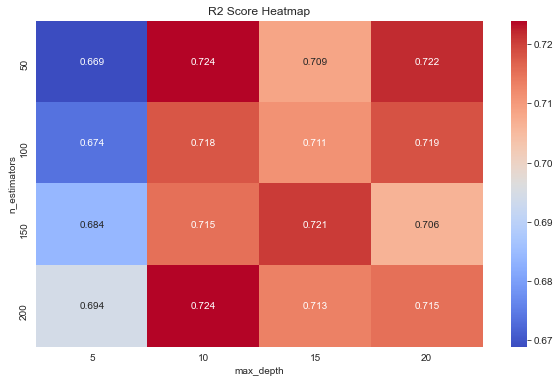

In [71]:
# Plot the r2 scores
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_scores.pivot('n_estimators', 'max_depth', 'r2_score'), annot=True, fmt='.3f', cmap='coolwarm', ax=ax)
ax.set_title('R2 Score Heatmap')
plt.show()

##### Scores are terrible. Going to try different hyperparameters.

## Trying Grid Search for a more systematic approach

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to try
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20]
}

# Create the model
rfr_model = RandomForestRegressor()

# Create the grid search object
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f'Best hyperparameters: {best_hyperparameters}, Best r2 score: {best_score}')

##### Grid Search Results -> Best hyperparameters: {'max_depth': 10, 'n_estimators': 150}, Best r2 score: 0.8635347858325373. Different from manual search.

Running the model with the best hyperparameters multiple times to check for consistency.

In [4]:
# Create the model with the best hyperparameters
rfr_model = RandomForestRegressor(n_estimators=150, max_depth=5)

#run the model 20 times and plot the r2 scores
r2_scores = []
for i in range(20):
    train, validation = train_test_split(df, test_size=0.2, random_state=i, shuffle=True)
    target = 'SalePrice'
    X_train = train.drop(target, axis=1)
    y_train = train[target]
    
    X_validation = validation.drop(target, axis=1)
    y_validation = validation[target]
    
    # Fit the model
    rfr_model.fit(X_train, y_train)

    # Make predictions
    validation_predictions = rfr_model.predict(X_validation)

    # Calculate and print the r squared error
    score = r2_score(y_validation, validation_predictions)
    print(score)
    r2_scores.append(score)

0.8173407910793228
0.8809145860105032
0.8527714165774962
0.7956468696165746
0.8483092439303945
0.8321490775241195
0.8073666744535695
0.8738879779580586
0.7890464808424689
0.8579544290795308
0.8373718538517235
0.8086899050485232
0.8084822156037306
0.6707515045138317
0.8424849569958671
0.8645715690598279
0.7235618940782845
0.8439513863342938
0.8794125991502914
0.6843555068654472


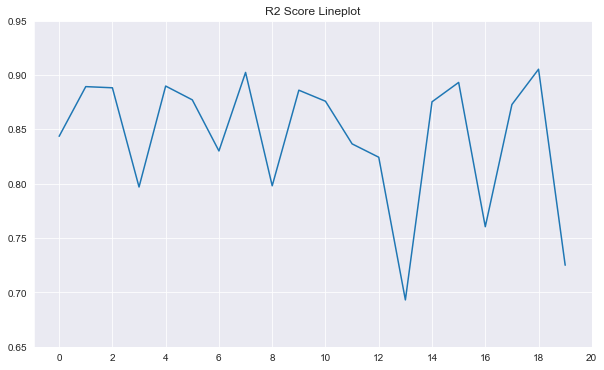

In [74]:
 # Plot the r2 scores to show consistency
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(20), y=r2_scores, ax=ax)
ax.set_title('R2 Score Lineplot')
ax.set_ylim(0.65, 0.95)
ax.set_xticks(range(0, 21, 2))
plt.show()

##### The r2 scores are consistent, except for some outliers. This means the hyperparameters are stable and the model is consistent.

## Submission to Kaggle

In [79]:
# Record predictions for the test set
test = pd.read_csv('../data/test_enc.csv')
test_predictions = rfr_model.predict(test)

# add the Id column to the predictions
df_test = pd.read_csv('../data/test.csv')
test_predictions = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': test_predictions})

# Save the predictions to a CSV file
test_predictions.to_csv('../rfr_test_predictions.csv', index=False)

test_predictions

,Id,SalePrice
0,1461,125768.834992
1,1462,154891.098734
2,1463,185193.770649
3,1464,184072.344910
4,1465,209211.151799
...,...,...
1454,2915,87637.333060
1455,2916,85452.827470
1456,2917,147949.328049
1457,2918,115232.728664
